<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        NHANES - MTech Project 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Feature Selection - Previous Studies fields - Lab Data Only
       </h2>
       <h3 style="color:#1a1a1a;
                    font-size:2em">
        Prakash Easow Thomas - 2022DA04285 - June 2024
       </h3>
</center>

# 1. Importing Libraries and Reading the Datasets

## 1.1 Importing the Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1.2 Reading the NHANES 2018 Datasets

In [5]:
merged_dfNHAENES2018_selected  = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Data\After_DataPreprocessing_Lab.csv')

# 2. Data Verification - NHANES 2018 Data

## 2.1 Data Verification

In [7]:
print(merged_dfNHAENES2018_selected)

      LBXGLU  LBXSGL  LBDHDD  LBDLDL  LBXTC  URXUCR  URDACT  LBXSCR  LBXSGTSI  \
0     125.00    85.0    60.0    18.0  157.0    24.0   13.33    0.92      21.0   
1     102.54    94.0    47.0    18.0  148.0    69.0   57.39    0.81      16.0   
2     114.02   115.0    68.0    18.0  189.0   209.0   19.90    0.64       9.0   
3     122.00   116.0    88.0   109.0  209.0    47.0   19.36    0.58      22.0   
4     125.00    96.0    65.0    18.0  176.0   215.0   12.28    1.32      31.0   
...      ...     ...     ...     ...    ...     ...     ...     ...       ...   
5946  158.00   150.0    60.0    43.0  119.0    51.0   10.39    0.70      18.0   
5947  122.63   101.0    49.0    18.0  182.0   231.0    4.42    0.92      28.0   
5948   94.00    88.0    54.0   108.0  172.0    31.0   10.97    0.69       8.0   
5949  111.15    84.0    34.0    18.0  150.0   177.0   47.01    0.85      16.0   
5950   91.00    90.0    34.0    75.0  163.0    75.0   70.93    0.82      72.0   

      LBXHGB  LBXMCHSI  LBX

In [8]:
nan_counts = merged_dfNHAENES2018_selected.isna().sum()
print("\nCount of NaN values in each column:")
print(nan_counts)


Count of NaN values in each column:
LBXGLU      0
LBXSGL      0
LBDHDD      0
LBDLDL      0
LBXTC       0
URXUCR      0
URDACT      0
LBXSCR      0
LBXSGTSI    0
LBXHGB      0
LBXMCHSI    0
LBXMC       0
LBXIN       0
URXPREG     0
LBXTR       0
LBXSUA      0
LBXGH       0
dtype: int64


# 3. Correlation Analysis

## 3.1 Normalizing the data 

In [10]:
min_max_scaler = MinMaxScaler()
normalized_df1 = pd.DataFrame(min_max_scaler.fit_transform(merged_dfNHAENES2018_selected), columns=merged_dfNHAENES2018_selected.columns)
normalized_df1.corr()

,LBXGLU,LBXSGL,LBDHDD,LBDLDL,LBXTC,URXUCR,URDACT,LBXSCR,LBXSGTSI,LBXHGB,LBXMCHSI,LBXMC,LBXIN,URXPREG,LBXTR,LBXSUA,LBXGH
LBXGLU,1.000000,0.820464,-0.140558,-0.086552,0.062423,-0.074051,0.111438,0.058173,0.120720,0.003675,-0.032041,-0.034699,0.154258,0.036916,0.169178,0.058428,0.906995
LBXSGL,0.820464,1.000000,-0.054420,0.101156,0.106155,-0.053931,0.113582,0.100815,0.137634,0.031730,0.004298,-0.003661,0.185011,0.037713,0.175886,0.031221,0.766333
LBDHDD,-0.140558,-0.054420,1.000000,0.067629,0.293426,-0.115837,-0.018864,-0.013600,0.049687,-0.170544,0.086418,-0.056717,-0.118460,-0.026952,-0.207046,-0.251021,-0.135507
LBDLDL,-0.086552,0.101156,0.067629,1.000000,0.287590,0.058663,0.017982,0.010993,0.018766,0.069106,-0.001617,-0.089237,0.173475,0.000624,0.107326,0.042889,0.017593
LBXTC,0.062423,0.106155,0.293426,0.287590,1.000000,-0.084813,0.017923,0.049529,0.160057,0.099178,0.090049,0.088550,-0.032255,-0.038724,0.207997,0.039805,0.069086
URXUCR,-0.074051,-0.053931,-0.115837,0.058663,-0.084813,1.000000,-0.034205,0.049007,0.000650,0.091421,-0.069452,-0.029362,0.029661,-0.010429,-0.013615,0.114292,-0.081070
URDACT,0.111438,0.113582,-0.018864,0.017982,0.017923,-0.034205,1.000000,0.295489,0.031916,-0.075203,-0.016635,-0.039228,0.080884,0.007383,0.057676,0.041713,0.139097
LBXSCR,0.058173,0.100815,-0.013600,0.010993,0.049529,0.049007,0.295489,1.000000,0.086774,0.012796,0.101956,0.028006,0.017577,0.050908,0.050316,0.267762,0.070297
LBXSGTSI,0.120720,0.137634,0.049687,0.018766,0.160057,0.000650,0.031916,0.086774,1.000000,0.112667,0.101358,0.054124,0.086578,0.037599,0.111295,0.150443,0.120778
LBXHGB,0.003675,0.031730,-0.170544,0.069106,0.099178,0.091421,-0.075203,0.012796,0.112667,1.000000,0.442627,0.516769,-0.001514,0.100908,0.115517,0.244244,-0.040923


## 3.2 Applying the Correlation and Heat map

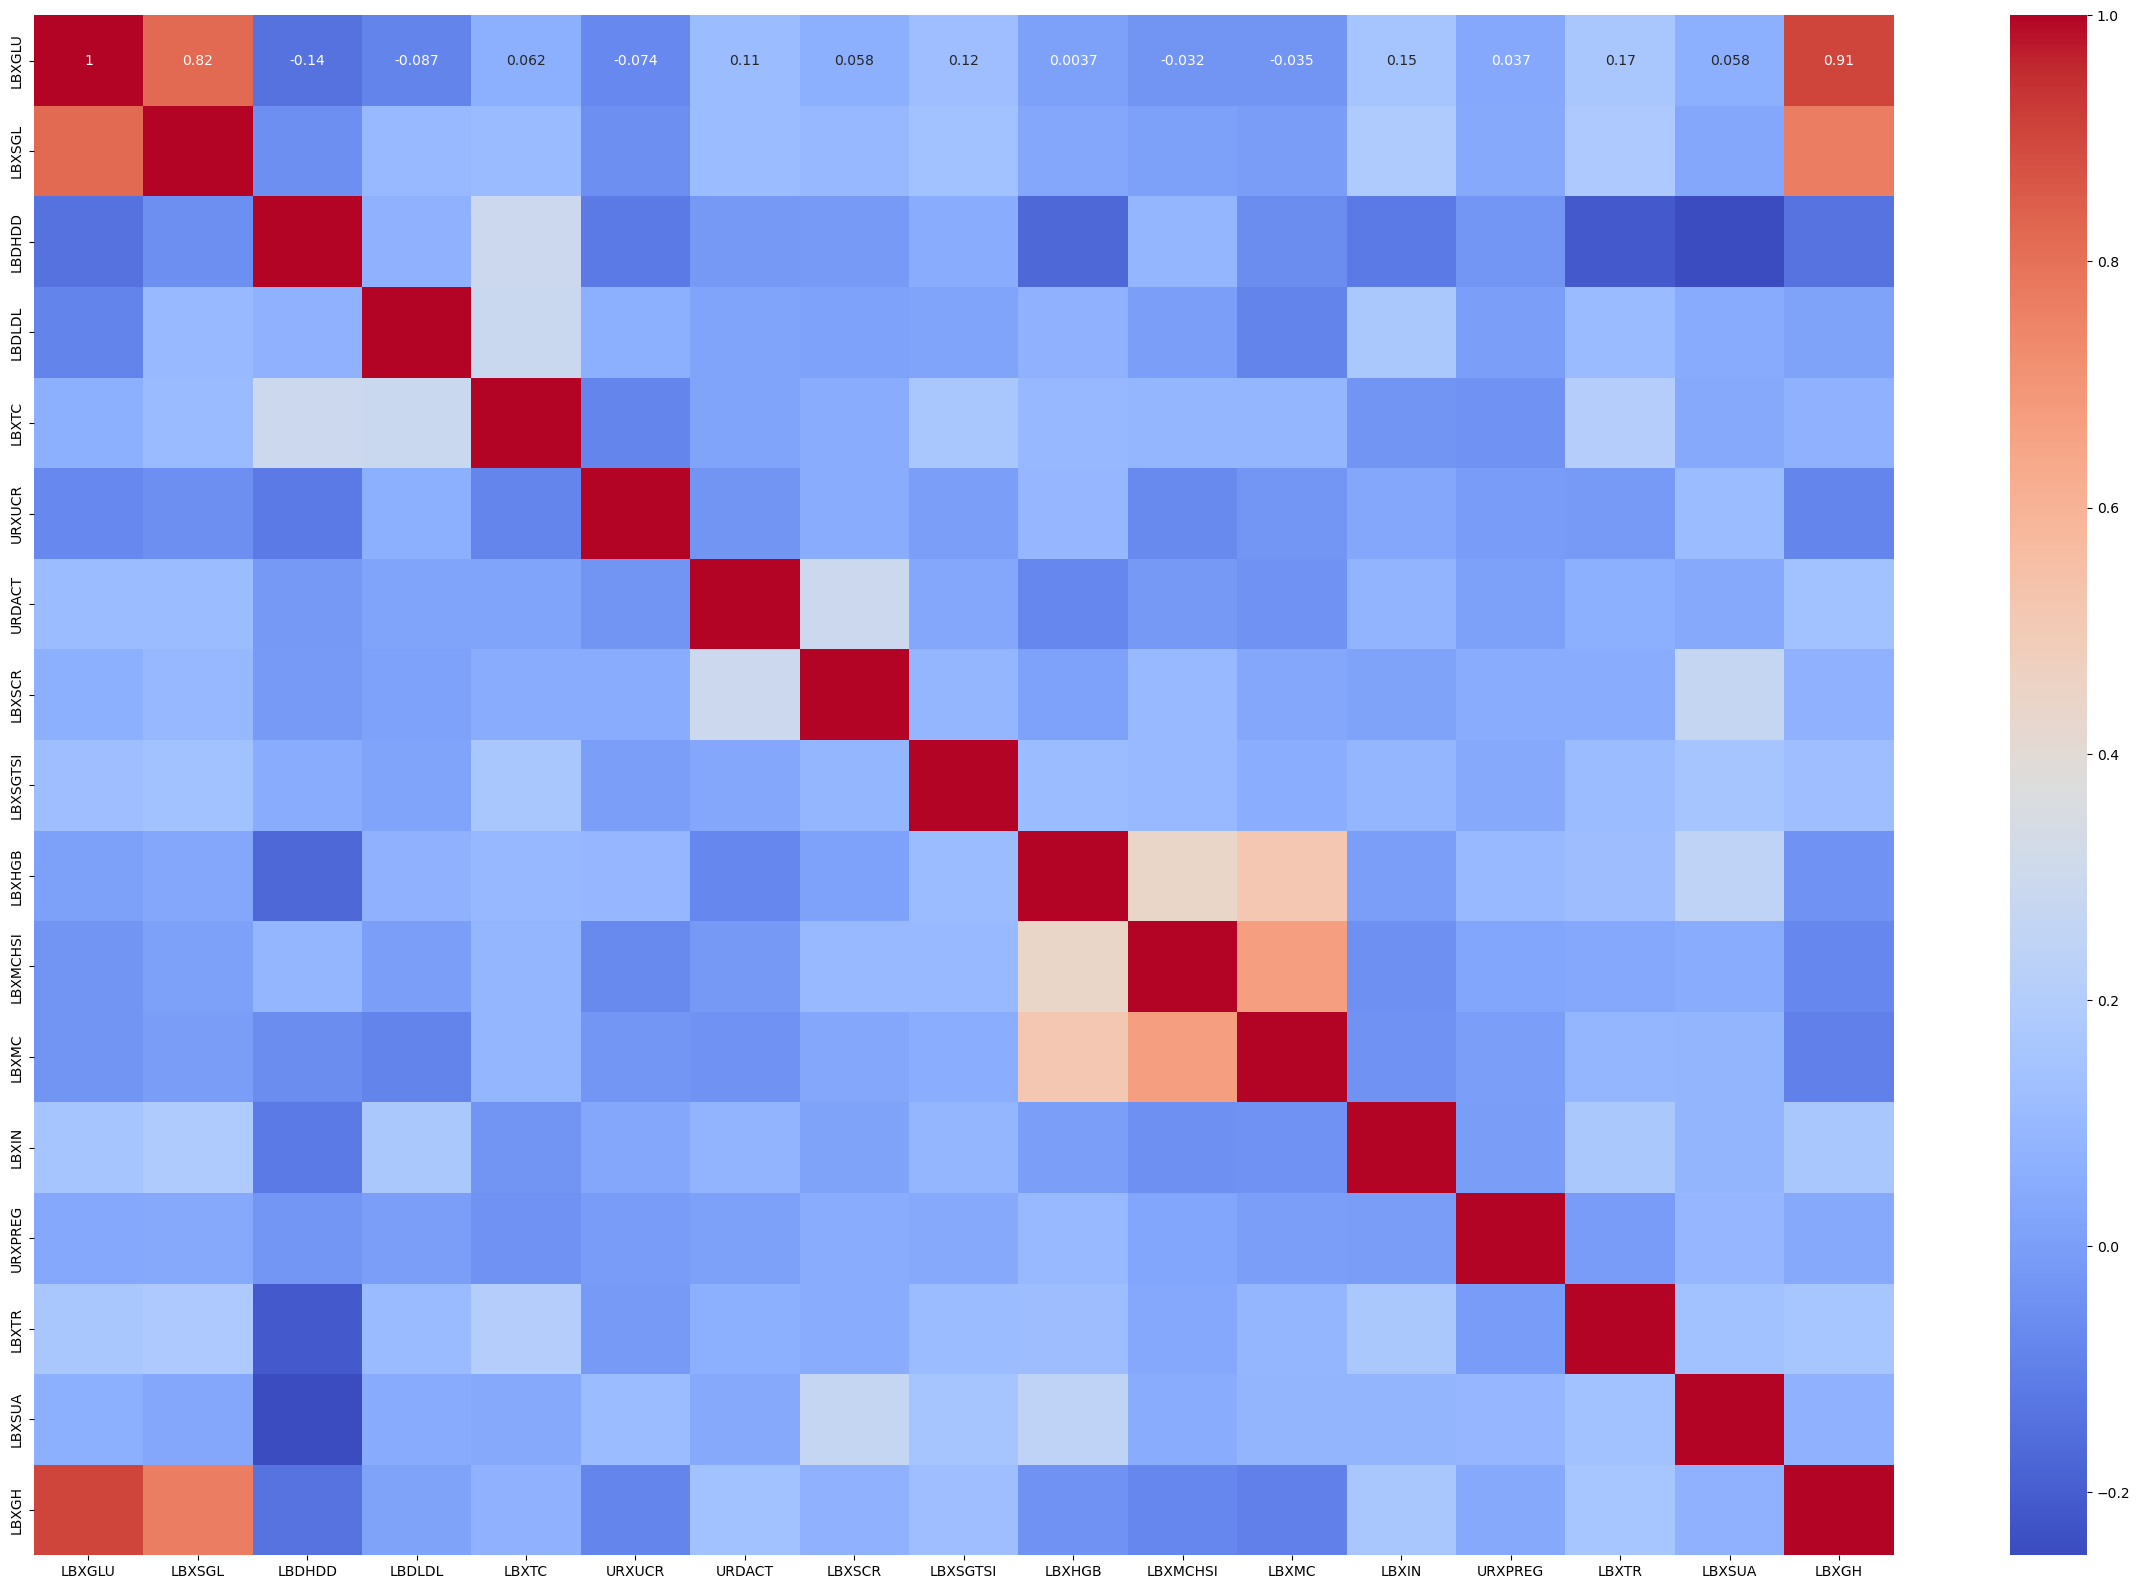

In [12]:
corr1 = normalized_df1.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr1, annot=True, cmap='coolwarm',annot_kws={"size": 10})
plt.show()

In [13]:
print(corr1.columns)

Index(['LBXGLU', 'LBXSGL', 'LBDHDD', 'LBDLDL', 'LBXTC', 'URXUCR', 'URDACT',
       'LBXSCR', 'LBXSGTSI', 'LBXHGB', 'LBXMCHSI', 'LBXMC', 'LBXIN', 'URXPREG',
       'LBXTR', 'LBXSUA', 'LBXGH'],
      dtype='object')


In [14]:
#def correlation(dataset, threshold):
#    col_corr = set()
#    corr_matrix = dataset.corr()
#    for i in range(len(corr_matrix.columns)):
#        for j in range(i):
#            if abs(corr_matrix.iloc[i,j]) > threshold:
#            if  corr_matrix.iloc[i,j]  > threshold:
#                colname = corr_matrix.columns[i]
#                colnamej = corr_matrix.columns[j]
#                print("i :"+str(i) +" "+colname ) 
#                print("j " +colnamej)
#                if (colname == 'LBXGH' and corr_matrix.iloc[i,j]  > 0): 
#                    print(colname+ ' '+colnamej +' ' + str( corr_matrix.iloc[i,j])) 
#                col_corr.add(colname)
#    return col_corr

In [15]:
def correlation(dataset, threshold):
    df = pd.DataFrame(columns=['Correlation Field', 'Field Name ','Correlation Value'])
    col_corr = set()
    k=0
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
#            if abs(corr_matrix.iloc[i,j]) > threshold:
            if  corr_matrix.iloc[i,j]  > threshold:
                colnamei = corr_matrix.columns[i]
                colnamej = corr_matrix.columns[j]
#                print("i "+colname) 
#                print("j " +colnamej)
                if (colnamei == 'LBXGH' and corr_matrix.iloc[i,j]  > 0): 
#                    print(colnamei + ' '+colnamej +' ' + str( corr_matrix.iloc[i,j])) 
                    new_row =pd.DataFrame({'Correlation Field': [colnamei], 'Field Name ': [colnamej],'Correlation Value':[corr_matrix.iloc[i,j]]})
                    df = pd.concat([df, new_row], ignore_index=True)
                    
                col_corr.add(colnamei)
    return col_corr,df

In [16]:
corr1_features,corr_data =correlation(normalized_df1,0.0)

C:\Users\praka\AppData\Local\Temp\ipykernel_10212\2724118623.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


In [17]:
print(corr1_features)

{'LBXIN', 'LBXSGTSI', 'LBXMCHSI', 'LBXTC', 'LBXGH', 'LBXSGL', 'LBXSCR', 'LBXHGB', 'URDACT', 'URXUCR', 'LBDLDL', 'LBXSUA', 'URXPREG', 'LBXMC', 'LBXTR'}


In [18]:
df_fnd = pd.read_csv('Field_Names_Details.csv')
filtered_df_fnd = df_fnd[df_fnd['Field Name '].isin(corr1_features)]
columns_to_select = ['File','Field Name ','Field Descriptions']
selected_filtered_df_fnd =filtered_df_fnd[columns_to_select]
print(selected_filtered_df_fnd.head(50))

      File Field Name                          Field Descriptions
901   Labs      URXUCR                  Creatinine, urine (mg/dL)
903   Labs      URDACT            Albumin creatinine ratio (mg/g)
918   Labs       LBXTR                       Triglyceride (mg/dL)
920   Labs      LBDLDL                    LDL-cholesterol (mg/dL)
926   Labs       LBXTC                  Total Cholesterol (mg/dL)
945   Labs      LBXHGB                          Hemoglobin (g/dL)
948   Labs    LBXMCHSI                  Mean cell hemoglobin (pg)
949   Labs       LBXMC  Mean cell hemoglobin concentration (g/dL)
1015  Labs       LBXGH                        Glycohemoglobin (%)
1033  Labs       LBXIN                            Insulin (uU/mL)
1140  Labs      LBXSCR     Creatinine, refrigerated serum (mg/dL)
1144  Labs      LBXSGL        Glucose, refrigerated serum (mg/dL)
1146  Labs    LBXSGTSI    Gamma Glutamyl Transferase (GGT) (IU/L)
1165  Labs      LBXSUA                          Uric acid (mg/dL)
1178  Labs

In [19]:
print(corr_data)  # Correlated data based on HbA1c

   Correlation Field Field Name   Correlation Value
0              LBXGH      LBXGLU           0.906995
1              LBXGH      LBXSGL           0.766333
2              LBXGH      LBDLDL           0.017593
3              LBXGH       LBXTC           0.069086
4              LBXGH      URDACT           0.139097
5              LBXGH      LBXSCR           0.070297
6              LBXGH    LBXSGTSI           0.120778
7              LBXGH       LBXIN           0.164883
8              LBXGH     URXPREG           0.041791
9              LBXGH       LBXTR           0.156663
10             LBXGH      LBXSUA           0.071170


In [38]:
df_fnd = pd.read_csv('Field_Names_Details.csv')
filtered_df_fnd = df_fnd[df_fnd['Field Name '].isin(corr_data['Field Name '])]
columns_to_select = ['File','Field Name ','Field Descriptions']
selected_filtered_df_fnd =filtered_df_fnd[columns_to_select]
#print(selected_filtered_df_fnd.head(50))
common_key = 'Field Name '
Final_HbA1c_Correlated_Data = corr_data.merge(selected_filtered_df_fnd, on=common_key, how='outer')
print('************** Correlated field based on HbA1c********************')
print(Final_HbA1c_Correlated_Data)

************** Correlated field based on HbA1c********************
   Correlation Field Field Name   Correlation Value  File  \
0              LBXGH      LBXGLU           0.906995  Labs   
1              LBXGH      LBXSGL           0.766333  Labs   
2              LBXGH      LBDLDL           0.017593  Labs   
3              LBXGH       LBXTC           0.069086  Labs   
4              LBXGH      URDACT           0.139097  Labs   
5              LBXGH      LBXSCR           0.070297  Labs   
6              LBXGH    LBXSGTSI           0.120778  Labs   
7              LBXGH       LBXIN           0.164883  Labs   
8              LBXGH     URXPREG           0.041791  Labs   
9              LBXGH       LBXTR           0.156663  Labs   
10             LBXGH      LBXSUA           0.071170  Labs   

                         Field Descriptions  
0                   Fasting Glucose (mg/dL)  
1       Glucose, refrigerated serum (mg/dL)  
2                   LDL-cholesterol (mg/dL)  
3               